
# Final  VEF Project: Spotify Audio Feature Exploration

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Data Overview</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<font size="5" color="green">*Spotify - Music for EveryOne*</font>

> In this Jupyter Notebook, I investigate the dataset which includes audio features of more than 130,000 Spotify tracks retrieved from [Kaggle](https://www.kaggle.com/tomigelo/spotify-audio-features "Go to Kaggle'dataset") latest updated by April 2019.

> With [Statistics by Spotify as of Sep 2021](https://newsroom.spotify.com/company-info/ "Go to page"), it is currently the world's leading audio streaming subscription service with 381 millions MAUs (montly active users)  which offers us a platform of more than 73 millions pieces of tracks and podcasts.

> My assumption is that popular songs may have some characteristics that are different from the less popular ones. 

> Over the course of this analysis, I will explore and visualize the data using Python libraries Pandas, Numpy and Matplotlib in order to answer three main research questions:

>> Firstly, we explore the most popular artists and the most popular tracks on Spotify over the course of our dataset.
    
>> To verify my assumption, the second research question will discover what kinds of properties are associated with songs that have higher popularity ratings? For example, do songs which bring more energy, valence and danceability receive higher popularity? We can answer this question by looking at the characteristics of the most popular tracks and comparing them with the rest of tracks as well.

>> Last by not least, we investigate whether there are any relationships between track's features themself and their popularity.

> Answers to those questions can benefit both Spotify and its customers to get a better understanding of the most significant patterns and trends in the music industry.

<a id='questions'></a>
## Data Overview

### I. Source 

> Dataset is downloaded from Kaggle which originally used the Spotify API to request and pull data. 

### II. General Properties

> The dataset consists information of artist_names, track_ids, track_names, track's features themself and their popularities.

> According to [the Spotify API documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-featuresaudio), each song is given a score in the following 3 categories:

>> (1) Mood includes tempo, energy, valence and dancebility. 

>>> Tempo: the speed of a given track measured by number of beats per minute (BPM). The higher the tempo is, the faster the speed of the song is.

>>> Energy: takes values from 0.0 to 1.0 which measures how fast, noisy and energetic a track feel. For example, death metal has high energy, while a Bach prelude scores low on the scale. 

>>> Danceability: receives values from 0.0 to 1.0 which describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.

>>> Valence: measures the positiveness and happiness of the song. The higher the valence of the track is, the happier and more cheerful mood the track conveys to listeners. 

>> (2) Properties consists of loudness, speechiness and instrumentalness.

>>> Loudness is the representation of a sound’s amplitude. According to [Spotify documentation](https://artists.spotify.com/help/article/loudness-normalization), track's loudness is normalized in Spotify which takes typical values in range between -60 and 0 db (Decibel). Higher loudness values represent the louder amplitudes the tracks have.

>>> Speechiness takes values between 0.0 and 1.0 which represents the presence of spoken words in a track. In Spotify defined system, they categorize speechiness into 3 groups, below 0.33, between 0.33 and 0,66, and above 0.66. Specifically, music and other non-speech-like tracks take values below 0.33. Rap music or tracks containing both music and speech are most likely to take value between 0.33 and 0.66. Whereas, talk show, audiobook, or poetry has speechiness values above 0.66.

>>> Instrumentalness demonstrates whether or not a track contains vocal content. For example, rap or spoken word tracks which are vocal take the value closer towards 0.0. Whereas, classical composers are more likely to the value approaching 1.0.

>> (3) Context is either Liveness or Acousticness.

>>> Liveness takes values from 0.0 to 1.0 which represents whether the track was performed live or was recorded. The closer the value approaches 1.0, the higher the possibility that the track was performed live.

>>> Acousticness represents whether the track is acoustic. 1.0 represents high confidence the track is acoustic and mellow.

>> There are also other recorded features of tracks including:

>>> Mode takes boolean value of 0 and 1 which indicates the modality (major or minor) of a track. 1 represents major while 0 represents minor.

>>> Key is the pitch that forms the basis of a song which uses standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. T12 keys are ranging from 0 to 11. Within Western music, there are 12 keys ranging from 0 to 11 which represents 12 basic musical tones respectively. Detail can be found in [this Wikipedia link](https://en.wikipedia.org/wiki/Pitch_class).

>>> duration_ms is the length of the track in milliseconds.

>>> time_signature measures how many beats are in each bar.

>>> popularity indicates the number of times that the tracks are replayed and it gets the values between 0 and 100. For example, the most popular tracks get the value of 100.

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for missing values, and then clean dataset for analysis. 

I. LOADING DATA

In [1]:
# Import all of the necessary packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read csv file
df=pd.read_csv('Spotify_audio_features_Apr_2019.csv')

In [2]:
# Investigate how the first 5 rows of the dataset look like 
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


II. ASSESSING DATA

In [3]:
# Investigate number of observations and variables of the data frame
df.shape

(130663, 17)

> Dataset has 130663 rows and 17 columns.

In [4]:
# Check for missing values
df.isnull().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

> There are no missing values in the dataset.

In [5]:
# Make sure there are no duplicated entries
df.duplicated().sum()

0

> This dataset does not have duplicated rows. 

In [6]:
# See if data is stored in the correct data form
df.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

> Except artist names, track ids and track names which are defined as strings, other variables are stored as either float or interger. This setting of data types makes sense since each feature of the track is given a score to measure the different characteristics of that track respectively.

> Except for mode type, it should be stored as a boolean with the value of either 0 or 1 instead of interger.

In [7]:
# Investigate the number of unique values for each variable
df.nunique()

artist_name          34621
track_id            130326
track_name          108879
acousticness          4908
danceability          1257
duration_ms          77897
energy                2571
instrumentalness      5387
key                     12
liveness              1717
loudness             25888
mode                     2
speechiness           1616
tempo                57314
time_signature           5
valence               1918
popularity             100
dtype: int64

> We can draw two interesting observations about our dataset from this output.

>> Firstly, even though we have more than 130k observations in the dataset, we only have less than 35k artists. This indicates that many artists might produce more than one track. We will look deeper into the list of the most prolific artists in the next session of our analysis. 

>> Secondly, even though we have 130663 rows in total and there is no duplicated row, we only have 130326 and 108879 unique values for track_id and track_name respectively. This suggests that some rows have the same track ids. We need to investigate deeper into these rows to see what are the reasons behind and decide what we should do with those tracks with the same ids. 

In [8]:
# print out the values of track_ids that have theirs count greater than 1
repeated_track_id = df['track_id'].value_counts().loc[lambda x : x>1] 
repeated_track_id

0UBafqn0HVWRceDnOv2SZu    4
569BGSWQapYD8Niuy67Cal    3
1afyMOxQCyfxUOSrCkStsy    3
02mqJ3mpw8MLDmM2cqIVB9    3
6eEVqkT1ZWHHzg08rfj7Uc    3
                         ..
3oCJJksC12uFxkt3RQ7rbV    2
17uivGWu6kfAvH6UgR7j4x    2
0NtYGyNUHAvdjI4nlYGRMw    2
1viXLN4tBpoTOLOVZK9IJy    2
3dkjQKhWBFPrAsoTNNGEzT    2
Name: track_id, Length: 328, dtype: int64

In [9]:
# Check the characteristics of first 20 rows with the same track ids
df_same_track_id=df.loc[df['track_id'].isin(repeated_track_id.index)].sort_values('track_id')
print('There are ' + str(df_same_track_id.shape[0]) + ' rows with same track ids.')
df_same_track_id

There are 665 rows with same track ids.


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
121309,Clean Bandit,02mqJ3mpw8MLDmM2cqIVB9,Baby (feat. Marina & Luis Fonsi) - Luca Schrei...,0.28500,0.718,195147,0.735,0.000000,0,0.0545,-8.198,0,0.3530,122.969,4,0.336,55
94195,Clean Bandit,02mqJ3mpw8MLDmM2cqIVB9,Baby (feat. MARINA & Luis Fonsi) - Luca Schrei...,0.28500,0.718,195147,0.735,0.000000,0,0.0545,-8.198,0,0.3530,122.969,4,0.336,55
119258,Clean Bandit,02mqJ3mpw8MLDmM2cqIVB9,Baby (feat. Marina and The Diamonds & Luis Fon...,0.28500,0.718,195147,0.735,0.000000,0,0.0545,-8.198,0,0.3530,122.969,4,0.336,55
126535,Hillsong UNITED,03UNuZgtHViMboufVtawCa,Not Today,0.00236,0.580,253664,0.717,0.000014,2,0.1010,-8.014,1,0.0359,92.018,4,0.587,59
118079,Hillsong United,03UNuZgtHViMboufVtawCa,Not Today,0.00236,0.580,253664,0.717,0.000014,2,0.1010,-8.014,1,0.0359,92.018,4,0.587,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123961,A$AP Rocky,7ycWLEP1GsNjVvcjawXz3z,Praise The Lord (Da Shine),0.06090,0.850,205040,0.569,0.081600,5,0.1000,-8.152,0,0.1360,80.020,4,0.294,86
114143,Descemer Bueno,7yfha8TaN0DVNGp180Z5Zr,Nos Fuimos Lejos,0.16200,0.755,209360,0.880,0.000013,7,0.1320,-3.003,1,0.0605,94.022,4,0.812,60
130221,Descemer Bueno,7yfha8TaN0DVNGp180Z5Zr,Nos Fuimos Lejos (feat. El Micha),0.16200,0.755,209360,0.880,0.000013,7,0.1320,-3.003,1,0.0605,94.022,4,0.812,60
128933,Teqkoi,7zlGyAsvNMOdhTU068f79f,Please Come Back,0.51000,0.737,121522,0.241,0.005720,9,0.1080,-16.034,0,0.0882,100.000,4,0.345,63


> From the first observations of the dataset, we can recognize that there are many tracks with same ids recorded with different track names, even though they share exactly the same audio features and popular ratings.

> This can be due to the fact that some tracks are recorded in both singles and albums but under different naming convention. So we can drops those duplicated observations to ensure that the same tracks recorded under different names are not recorded more than 1.

III. CLEANING DATA:

### Drop tracks that have the same features but appear to have different names

In [10]:
# Drop duplicated row
df.drop_duplicates(subset=['artist_name','track_id'],inplace=True)
df.shape
print('There are ' + str(df.shape[0]) + ' rows after dropping.')

There are 130436 rows after dropping.


> There are 227 duplicated rows droped out since our dataset is reduced from 130663 to 130436 rows.

### Change mode feature to boolean data types

In [11]:
# Change mode from float to boolean
df['mode'] = df['mode'].astype('bool')
# Recheck if the change is done
df.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                   bool
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

> In the next session, we will explore data with the cleaned dataframe.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section of the analysis process, we will find patterns in the variables, explore and visualize relationships in the data and create better features, also known as feature engineering. 

### I. Explore data distribution

In [12]:
# Quick glimse of numeric variable distributions
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,popularity
count,130436.000000,130436.000000,1.304360e+05,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000,130436.000000
mean,0.342630,0.581381,2.126253e+05,0.569115,0.224309,5.232099,0.194894,-9.978268,0.111980,119.470548,3.878822,0.439624,24.156437
std,0.345690,0.190094,1.232371e+05,0.260355,0.360479,3.602735,0.167751,6.545846,0.124343,30.161034,0.514732,0.259114,19.676575
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031575,0.459000,1.638800e+05,0.396000,0.000000,2.000000,0.097500,-11.903000,0.038900,96.013750,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.018930e+05,0.603000,0.000150,5.000000,0.124000,-7.983000,0.055800,120.026000,4.000000,0.420000,22.000000
75%,0.637000,0.727000,2.410320e+05,0.775000,0.443000,8.000000,0.236000,-5.686000,0.129000,139.632250,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,0.966000,249.983000,5.000000,1.000000,100.000000


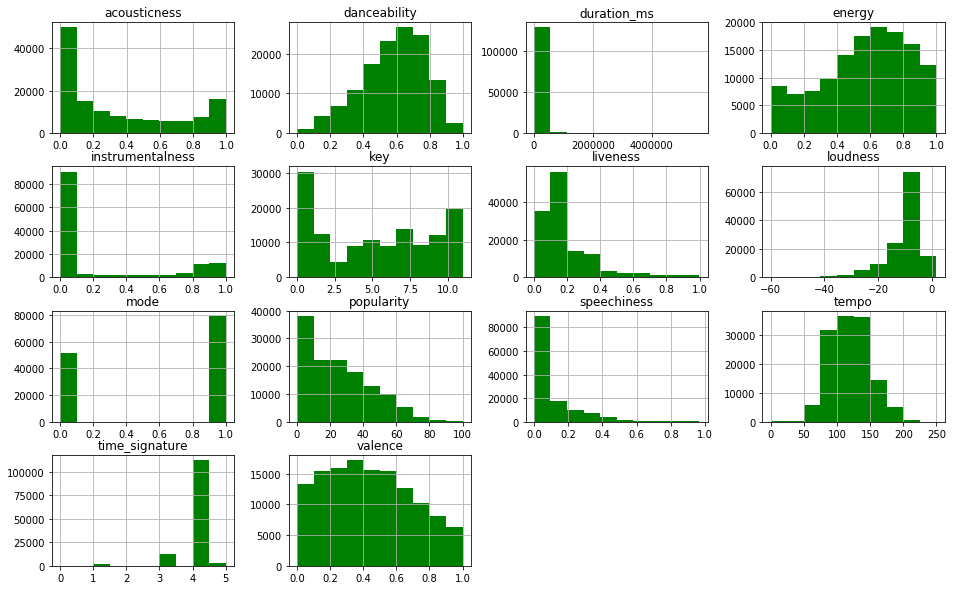

In [12]:
# Visual data distributions with histograms
df.hist(figsize=(16,10),color='green');

> Some quick observations of data distributions can be drawn from the above histograms as follows:

>> (1) Regarding to tracks' mood characteristics, tempo seems to follow a normal distribution. Additionally, danceability and energy appear to be skewed left. This means that songs in the dataset have a tendency to be energetic and danceable.

>> (2) > With regard to tracks' properties, while speechiness and instrumentalness are skewed right, loudness follows a skewed left distribution. This indicates that tracks have a higher likelihood to be music and other non-speech-like tracks and rather loud.  

>> (3) In terms of context, more songs were recorded rather than performed live. And tracks on average are more electronic rather than acoustic genre. 

>> (3) The most used keys among 12 musical keys seem to be C and C♯. And major mode constitutes for approximately 60% of track's mode. 

>> (4) 75% of tracks in the dataset get popularity score equal or lower than 40. Only one forth of the total of tracks get score above 38. But there is also track that get maximum score of popularity.

>> (5) Majority of tracks are distributed in range from 0 to 500000 miliseconds. Intuitively, minute is a more convinient measure to interpret track duration rather than milisecond. In the next step, we will conduct feature engineering to transform track length from miliseconds to minutes.

### II. Feature engineering

In [13]:
#  Add duration_minutes column
df['duration_minutes']= df.duration_ms/60000
df['duration']= df['duration_minutes'].round(2)

#df.round({"duration_minutes":2})
# Check if the new created field is added to the dataframe and have correct data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130436 entries, 0 to 130662
Data columns (total 19 columns):
artist_name         130436 non-null object
track_id            130436 non-null object
track_name          130436 non-null object
acousticness        130436 non-null float64
danceability        130436 non-null float64
duration_ms         130436 non-null int64
energy              130436 non-null float64
instrumentalness    130436 non-null float64
key                 130436 non-null int64
liveness            130436 non-null float64
loudness            130436 non-null float64
mode                130436 non-null bool
speechiness         130436 non-null float64
tempo               130436 non-null float64
time_signature      130436 non-null int64
valence             130436 non-null float64
popularity          130436 non-null int64
duration_minutes    130436 non-null float64
duration            130436 non-null float64
dtypes: bool(1), float64(11), int64(4), object(3)
memory usage: 19.

In [14]:
# Chek the distribution of track's duration in minutes
df['duration'].describe()

count    130436.000000
mean          3.543756
std           2.053956
min           0.050000
25%           2.730000
50%           3.360000
75%           4.020000
max          93.500000
Name: duration, dtype: float64

> On average, track duration is less than 4 minutes.

> There is track with the duration higher than 90 minutes. We can take a closer look to those tracks that last longer than an hour to see what those tracks are.

In [15]:
# Query rows with track duration higher than 90 minutes. 
df_long=df.query('duration >=60').sort_values('duration',ascending=False)
print('There are ' + str(df_long.shape[0]) + ' tracks that are longer than 60 minutes.')

There are 19 tracks that are longer than 60 minutes.


> I decide not to drop those rows but explore deeper on them in the next part of our analysis in order to understand more on features of these longest tracks.  

### III. Research Question 1: Most popular artists and tracks 
#### Who are the Top 10 profilic artists

In [16]:
# Top 10 artists who produce highest number of tracks
df[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(10)

,track_name
artist_name,
Johann Sebastian Bach,3611
Wolfgang Amadeus Mozart,1751
Armin van Buuren,1124
Ludwig van Beethoven,928
Frédéric Chopin,614
Claude Debussy,451
Image Sounds,369
Waka Flocka Flame,273
Los Cadetes De Linares,266


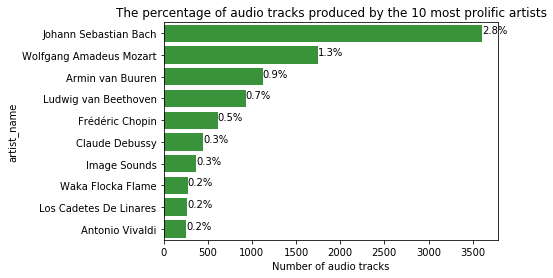

In [17]:
# Visualize the percentage of the top 10 prolific artists by chart
artist_order = df.groupby("artist_name")["track_id"].count().sort_values(ascending=False).head(10)
base_color = sns.color_palette()[2]
ax = sns.countplot(data=df, y='artist_name', color=base_color, order=artist_order.index)
plt.title("The percentage of audio tracks produced by the 10 most prolific artists")
plt.xlabel("Number of audio tracks")
# Print the percentage value on the chart
total = len(df) 
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))    
plt.show()

> Interestingly, 6 out of 10 most productive artists are one of the most best-known composers of classical music of all time. The rest 4 artists in the chart represents for electronic music, rap and ballad respectively. 

#### Which artists and tracks are on Spotify Top by popularity score in the spring of 2019?

In [18]:
# top 100 songs by popularity
top_100_song = df.sort_values('popularity',ascending=False).head(100)

# show the result of top 20 most popular songs
top_100_song[['artist_name', 'track_name', 'popularity']].head(20)

,artist_name,track_name,popularity
99393,Daddy Yankee,Con Calma,100
99364,Post Malone,Wow.,98
123909,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,98
99366,Jonas Brothers,Sucker,98
99368,Billie Eilish,bad guy,98
99365,Ariana Grande,"break up with your girlfriend, i'm bored",97
99372,Ariana Grande,7 rings,96
123941,Ava Max,Sweet but Psycho,96
123879,Marshmello,Happier,96
123873,Halsey,Without Me,96


> Daddy Yankee- a hit-after-hit artist is the only one who gets the perfect 100 score with his song 'Con Calma' collaborated with Canadian rapper Snow. The song has surpassed 2 billion views on Youtube by 2020.

In [19]:
# show top 10 artists who have dominated the Spotify charts with the most popular songs during the beginning of 2019
top_100_song[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(10)

,track_name
artist_name,
Billie Eilish,11
Post Malone,4
Ariana Grande,4
Khalid,4
Drake,3
Calvin Harris,3
Cardi B,3
Lady Gaga,2
Daddy Yankee,2


> Billie Eilish has 11 records which is the highest number of songs in the top 100 most popular tracks. Post Malone, Ariana Grande and Khalid come second with 4 tracks each. 

### IV. Research Question 2: Which are the charateristics of the most popular songs in the spring of 2019? And how are the most popular songs different from the rest of songs?


#### Research Question 2.1. A deep look at musical key feature of audio tracks

#####  Get dataframe of top 5% of the most popular tracks 

In [20]:
# Get the popularity score at the 95th percentile
df['popularity'].quantile([.9, .95])

0.90    53.0
0.95    60.0
Name: popularity, dtype: float64

In [21]:
# Find the number of tracks on top 5% in terms of popularity
print ('There are ' + str(df.query('popularity >=60').shape[0])+ ' tracks (equivalent to 5% of the total tracks) that have popularity score at or higher than 60') 

There are 7105 tracks (equivalent to 5% of the total tracks) that have popularity score at or higher than 60


In [22]:
# Create the dataframe for top 5% of the most popular songs
top_pop_song=df.query('popularity>=60')

##### Get dataframe of the rest of the tracks 

In [23]:
# Query tracks whose popularity are below 60
rest_data=df.query('popularity<60')

In [24]:
# Check to make sure the total number of rows of two new created datasets equals the number of rows in the original cleaned dataframe, which has 130436 rows.
num_rows=df.shape[0]
num_rows==top_pop_song['popularity'].count()+rest_data['popularity'].count()

True

##### Is there any variation in the musical key usage between the most popular tracks and the less popular tracks? 

###### Create the chart depicting the frequency of musical keys played in the most popular tracks

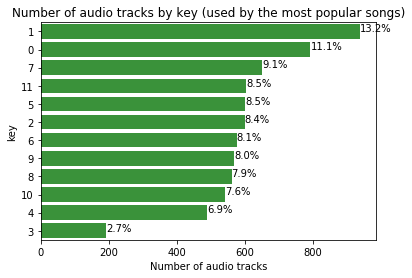

In [25]:
# Get key in descending order of frequency
key_top_song = top_pop_song.groupby("key")["track_name"].count().sort_values(ascending=False)
order=key_top_song.index

# Draw bar chart for key using seaborn
ax = sns.countplot(data=top_pop_song, y='key', color=base_color, order=key_top_song.index)
plt.title("Number of audio tracks by key (used by the most popular songs)")
plt.xlabel("Number of audio tracks")

# Print the percentage value on the chart
total = len(top_pop_song)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))    
plt.show()

> As shown by chart, out of all keys available, key 1, 0, and 7 (equivalent to C Minor, C Major, and G Major) are the most popular musical keys played by top 5% of the most popular songs. They accounted for 13.2%, 11.1% and 9.1% of songs respectively. Whereas, D Minor is the least used key among popular tracks.

> We will see how this result varies when it comes to the rest of songs.

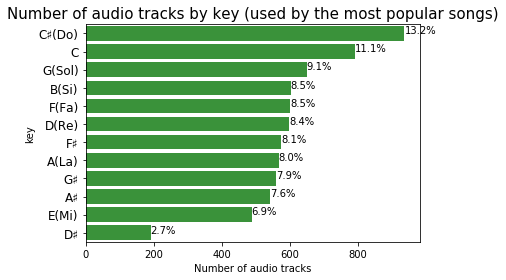

In [26]:
# Get the same chart above but converting keys in number format into musical terms for easier interpretation 
key_top_song = top_pop_song.groupby("key")["track_name"].count().sort_values(ascending=False)
order=key_top_song.index
ax = sns.countplot(data=top_pop_song, y='key', color=base_color, order=key_top_song.index)

# Convert y tick labels into music terminology manually based on the order from previous chart
ax.set_yticklabels(['C♯(Do)','C','G(Sol)','B(Si)','F(Fa)','D(Re)','F♯','A(La)','G♯','A♯','E(Mi)','D♯'],size = 12)
plt.title("Number of audio tracks by key (used by the most popular songs)",size=15)
plt.xlabel("Number of audio tracks")

# Print the percentage value on the chart
total = len(top_pop_song)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))    
plt.show()

###### Create the similar chart for the rest of tracks to see if there is any dissimilarity in keys used compared to the most popular songs

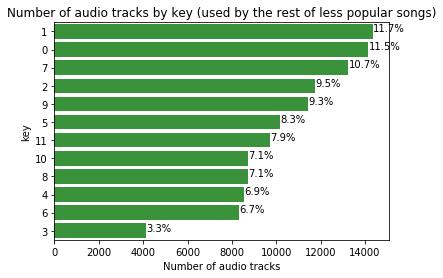

In [27]:
# Geeting key used in the rest of the song dataframe in descending order
key_rest_song = rest_data.groupby("key")["track_name"].count().sort_values(ascending=False)

# Plot the bar chart to count the number and percentage of songs group by key
ax = sns.countplot(data=rest_data, y='key', color=base_color, order=key_rest_song.index)

plt.title("Number of audio tracks by key (used by the rest of less popular songs)")
plt.xlabel("Number of audio tracks")
# Print the percentage value on the chart
total = len(rest_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))    
plt.show()

> Interestingly, C Minor, C Major and G Major also dominate other keys in the unpopular tracks. This finding seems to strengthen [one of Spotify analysis on 30 million songs in 2015](https://www.hypebot.com/hypebot/2015/05/the-most-popular-keys-of-all-music-on-spotify.html) which also finds out that G Major and C Major predominate over other keys. They pointed out the main reason is because G Major is the most convenient and easiest key to play around on both piano and guitar. With regard to C Major, it is the easiest to play on piano, which is also the greatest choice for piano composers. 

> Needless to say, piano and guitar are the two most popular instruments with Weastern comtemporary musicians who have contributed a lot of tracks on Spotify. By choosing these two keys, musicians can devote more of their time and energy on the more complicated song factors such as lyrics or melody. 

> Additionally, the result from both charts also suggests that major keys which represent more cheerful sounding vibes are prefered by 1.7 times more than minor keys. This supports the histogram distribution of mode feature in the previous session, which indicates that two thirds of songs are recorded with major mode. 

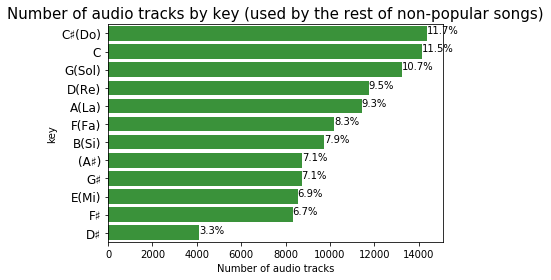

In [28]:
# Get the same chart above but converting keys in number format into musical terms for easier interpretation 
key_rest_data = rest_data.groupby("key")["track_name"].count().sort_values(ascending=False)
order=key_rest_data.index
ax = sns.countplot(data=rest_data, y='key', color=base_color, order=key_rest_data.index)

# Convert y tick labels into music terminology manually based on the order from previous chart
ax.set_yticklabels(['C♯(Do)','C','G(Sol)','D(Re)','A(La)','F(Fa)','B(Si)','(A♯)','G♯','E(Mi)','F♯','D♯'],size = 12)
plt.title("Number of audio tracks by key (used by the rest of non-popular songs)",size=15)
plt.xlabel("Number of audio tracks")

# Print the percentage value on the chart
total = len(rest_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))    
plt.show()

#### Research Question 2.2. Deep dive in mood, property and context  feature of audio tracks

> We will use radar chart to visualize the mean values of audio feautures for two datasets, top popular songs and not top songs to compare how their features are different. 

In [29]:
# Take mean values of audio features from both top and no top track datasets

print ('Mean value of danceability of no top songs and top songs are '+str(round(rest_data['danceability'].mean(),2))+ ' and  ' + str(round(top_pop_song['danceability'].mean(),2))+ ' respectively \n')

print ('Mean value of valence of no top songs and top songs are '+str(round(rest_data['valence'].mean(),2))+ ' and  ' + str(round(top_pop_song['valence'].mean(),2))+ ' respectively \n')

print ('Mean value of energy of no top songs and top songs are '+str(round(rest_data['energy'].mean(),2))+ ' and  ' + str(round(top_pop_song['energy'].mean(),2))+ ' respectively \n')

print ('Mean value of instrumentalness of no top songs and top songs are '+str(round(rest_data['instrumentalness'].mean(),2))+ ' and  ' + str(round(top_pop_song['instrumentalness'].mean(),2))+ ' respectively \n')

print ('Mean value of speechiness of no top songs and top songs are '+str(round(rest_data['speechiness'].mean(),2))+ ' and  ' + str(round(top_pop_song['speechiness'].mean(),2))+ ' respectively \n')

print ('Mean value of liveness of no top songs and top songs are '+str(round(rest_data['liveness'].mean(),2))+ ' and  ' + str(round(top_pop_song['liveness'].mean(),2))+ ' respectively \n')

print ('Mean value of acousticness of no top songs and top songs are '+str(round(rest_data['acousticness'].mean(),2))+ ' and  ' + str(round(top_pop_song['acousticness'].mean(),2))+ ' respectively \n')

Mean value of danceability of no top songs and top songs are 0.58 and  0.65 respectively 

Mean value of valence of no top songs and top songs are 0.44 and  0.46 respectively 

Mean value of energy of no top songs and top songs are 0.57 and  0.6 respectively 

Mean value of instrumentalness of no top songs and top songs are 0.23 and  0.08 respectively 

Mean value of speechiness of no top songs and top songs are 0.11 and  0.12 respectively 

Mean value of liveness of no top songs and top songs are 0.2 and  0.17 respectively 

Mean value of acousticness of no top songs and top songs are 0.35 and  0.29 respectively 



In [30]:
# Provide lists to contain 7 features of tracks and their mean values from two dataframes 
features=['danceability','valence','energy','instrumentalness','speechiness','liveness', 'acousticness']
rest=[0.58,0.44,0.57,0.23,0.11,0.2,0.35]
top=[0.65,0.46,0.6,0.08,0.12,0.17,0.29]

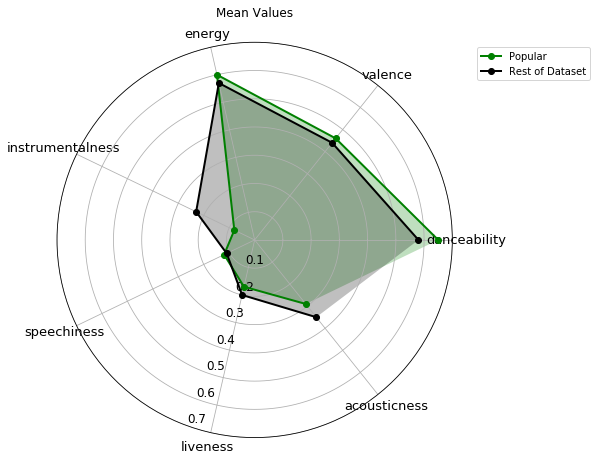

In [32]:
# Set the style for matplotlib as ggplot
#plt.style.use('ggplot')

# obtain the angles using linespace function of numpy
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)

fig = plt.figure(figsize = (20,16))

# Plot for top songs
ax = fig.add_subplot(211, polar=True)
ax.plot(angles, top, 'o-', linewidth=2, label = "Popular", color= 'green')
ax.fill(angles, top, alpha=0.25, facecolor='green')
ax.set_thetagrids(angles * 180/np.pi, features , fontsize = 13)

# Set tick values for radar to cover the maximum of mean values
ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'], size=12)
plt.ylim(0,0.7)

# Plot for less popular songs
ax.plot(angles, rest, 'o-', linewidth=2, label = "Rest of Dataset", color= 'black')
ax.fill(angles, rest, alpha=0.25, facecolor='black')

# Set title and legends of the chart
ax.set_title('Mean Values')
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05,1.0),loc='best'); 

> The radar chart gives us some useful and interesting observations. It seems like there are some differences between the two track subcategories.

> First of all, with regard to tracks' mood, we can observe that the most popular songs have tendency to be more energetic, happier and more danceable than the rest of songs. 

> Along with higher level of energy, valence and danceability, the top popular songs seem to be also more likely to be less acoustic and mellow with piano or violin but significantly more vocal. This insight seems to give us an initial impression that songs have higher likelihood to become hits if they offer audiences the more compelling vocals and ignite the fresh, cheerful and positive feelings in audiences.

> In regards to the context of the tracks, more popular songs have been recorded rather than performed live. 

#### Research Question 2.3. Do tracks with longer duration receive better ratings?

#####  In the previous exploratory step, we also discover that there are tracks lasting more than an hour. We can detect what are those songs and what kind of track types they are.

In [33]:
# Look at 19 tracks that last more than 60 minutes
df_long[['artist_name', 'track_name','duration', 'popularity']]

,artist_name,track_name,duration,popularity
40548,John,Ever,93.50,0
40545,John,Whatever,84.00,1
40546,John,Yeah,81.56,0
40547,John,What,81.52,1
5427,Excision,Lost Lands 2017 Mix,80.51,41
40549,John,So,80.50,0
73443,Franco Escamilla,Lo Que No Le Dirías a Tu Pareja,77.70,32
83812,Franco Escamilla,Series De La Infancia,71.72,29
83902,DJ Luigi,Reggaeton Karmoso 12,62.96,14
88950,Franco Escamilla,29 de Mayo Ganan las Chivas (En Vivo),62.82,27


> Those tracks appear to be either podcasts, albums and espisodes rather than single tracks and they do notseem to get high ratings on Spotify. 

#####  Do tracks with better ratings generally last shorter?


In [51]:
# Average duration of the most popular tracks vs the rest of data
print ('Mean length of most popular tracks is ' + str(round(top_pop_song['duration'].mean(),2)) + ' whereas mean length of the rest of tracks is '+ str(round(rest_data['duration'].mean(),2)))

Mean length of most popular tracks is 3.36 whereas mean length of the rest of tracks is 3.55


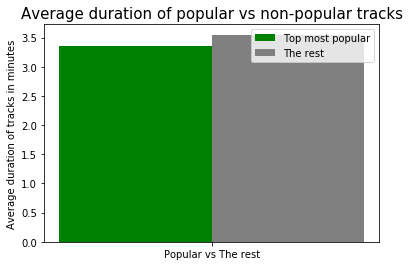

In [52]:
# Visualize the mean value of duration of two dataframes with bar chart
X = ['Popular vs The rest']
Ygirls = [3.36]
Zboys = [3.55]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Top most popular',color='green')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'The rest', color ='grey')
  
plt.xticks(X_axis, X)

plt.ylabel("Average duration of tracks in minutes")
plt.title("Average duration of popular vs non-popular tracks", size = 15)
plt.legend()
plt.show()

> As shown in chart, top songs have a higher tendency to be shorter in duration.

### V. Research Question 3: Is there any strong correlation between variables themself?

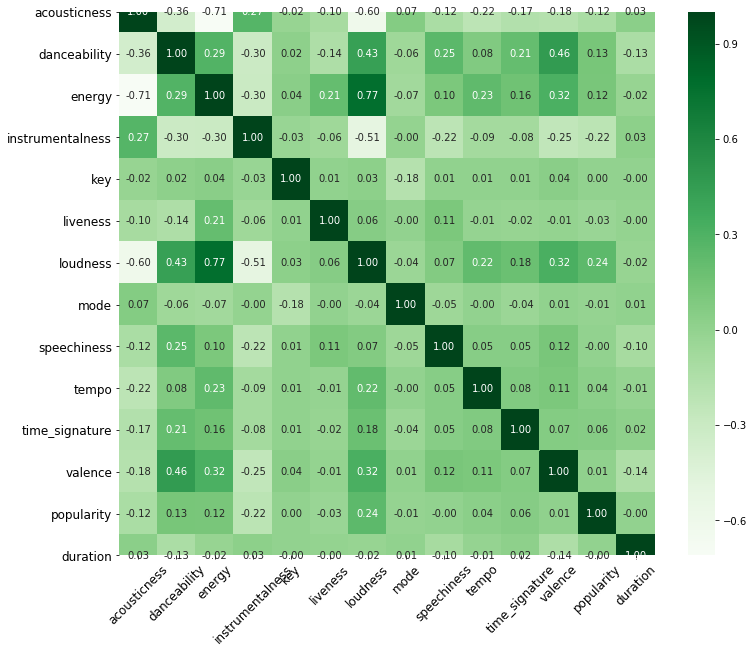

In [58]:
# Get the correlation heatmap of all variables
feature_df=df.drop(columns=['artist_name','track_id','track_name','duration_ms','duration_minutes'])
corr = feature_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap='Greens', annot=True ,fmt='.2f')
plt.yticks(fontsize=12)
plt.xticks(rotation=45,fontsize=12);

### Some findings we can observe from the heatmap as follows:

> The highest correlation is to be seen between loudness and energy which get the value of 0.77. This is possibly due to the fact that listeners have tendency to relate the high level of songs' energy with its loudness. One suggestion can be that musicians can best make their songs sound energetic by increasing the level of their's loudness. 

> Dancebility and valence has the second highest correlation of 0.46. This can be intuitively intepreted as the happier the songs are, the more danceable vibe they convey.

> Acousticness and instrumentalness and liveness have a respectively -0.12, -0.22 and -0.03 correlation with popularity; This strenghthens the finding  we see in the previous exploration that Spotify audiences seem to prefer listening to tracks with electonic instruments like electric guitars and keyboards rather than enjoying acoustic ones such as acoustic guitar, piano, or orchestra.

<a id='conclusions'></a>
## Conclusions

> We have investigated the Spotify audio track dataset, wrangled and cleansed the data set, and made a few observations. We have found some main findings and a few recommendations to make a track publiced on Spotify popular as followed: 

> (1) Most prolific artists are of all time best-known composers of classical music.

> (2) C Minor, C Major and G Major dominate other keys to be the most used musical keys due to convenience and ease to play on piano and guitar.

> (3) Musicians can have a higher chance to make hits on Spotify by composing more energetic, positive and more danceable musical pieces. Generally, higher energy and lower songs out perform low energy and quieter songs.

> (4) Tracks have higher likelihood to be popular if they offer audiences more compelling vocals and ignite the fresh, cheerful and positive feelings in audiences.

> (5) Live performance are less prefered compared to recorded audios when it comes to taste of Spotify customers.

> (6) On average, shorter duration of tracks are expected to give them a higher score of popularity. 

> (7) Generally, higher energy and louder tracks have a higher chance to become popular on Spotify than lower energy and quieter tracks.

> (8) Using electonic instruments like electric guitars and keyboards can improve the chance of success for musicians once they release their songs on Spotify platform.

> Regards to the limitations of this project, as this was only an exploratory analysis, these findings do not imply any statistical conclusions. The data should be further inspected with proper statistical test in order to drive more potential correlations.